In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('train.csv')

In [4]:
data.drop(['Cabin','Name','Ticket'],inplace=True,axis=1) #delete column 
data['Age'] = data['Age'].fillna(data['Age'].mean())
data = data.dropna()
labels = data['Embarked'].unique().tolist()
data['Embarked'] = data['Embarked'].apply(lambda x: labels.index(x)) #S-->0, C-->1, Q-->2
data.loc[:,'Sex'] = (data.loc[:,'Sex'] == 'male').astype(int)

In [5]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [6]:
x = data.iloc[:,data.columns != "Survived"]

In [7]:
y = data.iloc[:,data.columns == 'Survived']

In [8]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(x,y,test_size=0.2)

In [9]:
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [10]:
clf = DecisionTreeClassifier(random_state=30)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)

score

0.7359550561797753

In [11]:
score = cross_val_score(clf,x,y,cv=10).mean()
score

0.7514683350357507

0.8166624106230849


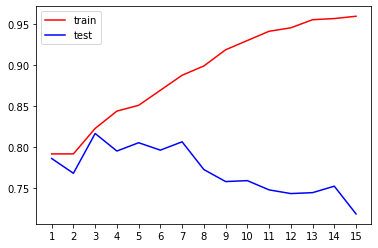

In [12]:
train_score = []
test_score = []
for i in range(15):
    clf = DecisionTreeClassifier(random_state=25,
                                 max_depth = i+1,
                                 criterion = 'entropy')
    clf = clf.fit(Xtrain,Ytrain)
    score_train = clf.score(Xtrain,Ytrain)
    score_test = cross_val_score(clf,x,y,cv=10).mean()
    train_score.append(score_train)
    test_score.append(score_test)
print(max(test_score))    
plt.plot(range(1,16),train_score,color="red",label="train")
plt.plot(range(1,16),test_score,color="blue",label="test")
plt.xticks(range(1,16))
plt.legend()
plt.show()

In [13]:
import numpy as np

clf = DecisionTreeClassifier(random_state=25)
parameters = {'criterion':('gini','entropy'),
              'splitter':('best','random'),
              'max_depth':[*range(1,10)],
              'min_samples_leaf':[*range(1,20,2)],
              
    
}
GS = GridSearchCV(clf, parameters, cv=10)
GS = GS.fit(Xtrain,Ytrain)

/Users/danjinjiang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [14]:
GS.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 3,
 'splitter': 'best'}

In [15]:
GS.best_score_

0.8241912798874824